In [86]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Paso 1: Carga tus datos (reemplaza 'data.csv' con tu archivo de datos)
df = pd.read_csv("data/avocado.csv")

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [87]:
df2 = pd.DataFrame(df[["Total Volume", "Total Bags"]])

df2.head()

,Total Volume,Total Bags
0,64236.62,8696.87
1,54876.98,9505.56
2,118220.22,8145.35
3,78992.15,5811.16
4,51039.60,6183.95


In [88]:
for col in df2.columns:
    avg = df2[col].mean()
    sd = df2[col].std()
    df2[col] = df[col].apply(lambda x: (x - avg) / sd)

df2.head()

,Total Volume,Total Bags
0,-0.227710,-0.234164
1,-0.230420,-0.233344
2,-0.212079,-0.234723
3,-0.223438,-0.237090
4,-0.231531,-0.236712


<Axes: xlabel='Total Volume'>

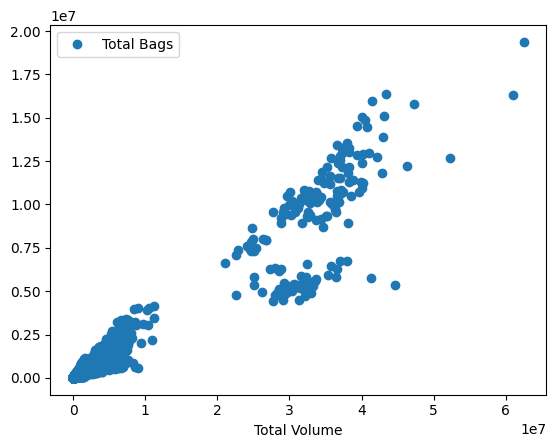

In [89]:
df.plot(x="Total Volume", y="Total Bags", style="o")

In [90]:
km = KMeans(n_clusters=2)
df2["cluster"] = km.fit_predict(df2)

df2.head()

c:\Users\almei\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Total Volume,Total Bags,cluster
0,-0.227710,-0.234164,0
1,-0.230420,-0.233344,0
2,-0.212079,-0.234723,0
3,-0.223438,-0.237090,0
4,-0.231531,-0.236712,0


In [91]:
df2["cluster"].value_counts()

cluster
0    18080
1      169
Name: count, dtype: int64

<Axes: xlabel='Total Volume', ylabel='Total Bags'>

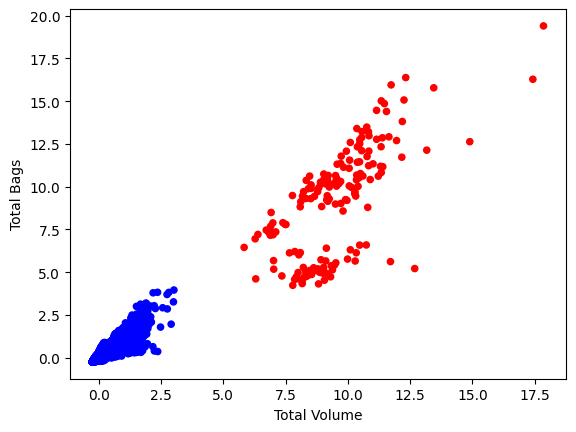

In [92]:
col = df2["cluster"].map({0: "b", 1: "r"})
df2.plot.scatter(x="Total Volume", y="Total Bags", style="o", c=col)